In [883]:
%matplotlib inline

# Nutrition and Fitness Correlation Analysis

In [884]:
# First step is to import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

In [885]:
# After that loading the dataset
daily_performance_dataset = pd.read_csv('data/Daily_performance_data.csv')

In [886]:
# Then I will familiarizate with dataset also I am going to perform data tidying and data cleaning if it is necessary.
# Getting general information about the dataset
daily_performance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  341 non-null    object 
 1   Weight                332 non-null    float64
 2   scriptedIntensity     341 non-null    object 
 3   RPE                   292 non-null    float64
 4   Strain                326 non-null    float64
 5   maxHR                 318 non-null    float64
 6   averageHR             318 non-null    float64
 7   kCal_Out              307 non-null    float64
 8   kCal_In               248 non-null    float64
 9   Protein               246 non-null    float64
 10  Carbs                 247 non-null    float64
 11  Fats                  245 non-null    float64
 12  saturatedFat          246 non-null    float64
 13  Cholesterol           246 non-null    float64
 14  Sodium                245 non-null    float64
 15  Potassium             2

In [887]:
# To check how many rows and columns the dataset has, i will use this command:
daily_performance_dataset.shape

(347, 45)

In [888]:
# as we see it has 347 rows and 45 columns.
# Now I want to see what are the names of the columns
daily_performance_dataset.columns

Index(['Date', 'Weight', 'scriptedIntensity', 'RPE', 'Strain', 'maxHR',
       'averageHR', 'kCal_Out', 'kCal_In', 'Protein', 'Carbs', 'Fats',
       'saturatedFat', 'Cholesterol', 'Sodium', 'Potassium', 'Sugar',
       'Vitamin_A', 'Vitamin_C', 'Calcium', 'Iron', 'Creatine', 'Fish Oil',
       'Vitamin_D', '135ozWater', 'totalSleep', 'sleepOnset', 'sleepEnd',
       'In_bed_duration', 'Light_sleep_duration', 'Deep_SWS_duration',
       'REM_Duration', 'awakeDuration', 'HRV', 'restingHR', 'respitoryRate',
       'iceTub', 'redLight', 'Speed', 'Strength', 'Mental', 'Soreness',
       'Overall', 'Notes', 'Alcohol'],
      dtype='object')

In [889]:
# I want to see how dataset looks like but not whole, only first 2 rows. I make this to get some basic image of the dataset.
daily_performance_dataset.head(2)

,Date,Weight,scriptedIntensity,RPE,Strain,maxHR,averageHR,kCal_Out,kCal_In,Protein,...,respitoryRate,iceTub,redLight,Speed,Strength,Mental,Soreness,Overall,Notes,Alcohol
0,"Tuesday, March 1, 2022",227.0,Medium,6.0,9.4,173.0,132.0,2389.0,3819.8,285.7,...,13.5,True,True,8.0,9.0,10.0,2.0,8.0,NaN,False
1,"Wednesday, March 2, 2022",228.0,Light,5.0,7.2,156.0,128.0,2420.0,2849.6,223.0,...,13.4,True,False,7.0,9.0,8.0,4.0,7.0,NaN,False


In [890]:
# Check if the dataset has some null or missing values
daily_performance_dataset.isna().sum()

Date                      6
Weight                   15
scriptedIntensity         6
RPE                      55
Strain                   21
maxHR                    29
averageHR                29
kCal_Out                 40
kCal_In                  99
Protein                 101
Carbs                   100
Fats                    102
saturatedFat            101
Cholesterol             101
Sodium                  102
Potassium               104
Sugar                   104
Vitamin_A               104
Vitamin_C               105
Calcium                 107
Iron                    108
Creatine                  6
Fish Oil                  6
Vitamin_D                 6
135ozWater                6
totalSleep               65
sleepOnset               66
sleepEnd                 66
In_bed_duration          66
Light_sleep_duration     66
Deep_SWS_duration        66
REM_Duration             66
awakeDuration            68
HRV                      54
restingHR                52
respitoryRate       

In [891]:
# as we see there is a lot of missing values. I can't simple drop null values,
# because it is a lot and i will lost a lot of information with this action.
# Now i want to check type of the columns. That will help me to take decision how to fill this missing information.
daily_performance_dataset.dtypes

Date                     object
Weight                  float64
scriptedIntensity        object
RPE                     float64
Strain                  float64
maxHR                   float64
averageHR               float64
kCal_Out                float64
kCal_In                 float64
Protein                 float64
Carbs                   float64
Fats                    float64
saturatedFat            float64
Cholesterol             float64
Sodium                  float64
Potassium               float64
Sugar                   float64
Vitamin_A               float64
Vitamin_C               float64
Calcium                 float64
Iron                    float64
Creatine                 object
Fish Oil                 object
Vitamin_D                object
135ozWater               object
totalSleep              float64
sleepOnset               object
sleepEnd                 object
In_bed_duration         float64
Light_sleep_duration    float64
Deep_SWS_duration       float64
REM_Dura

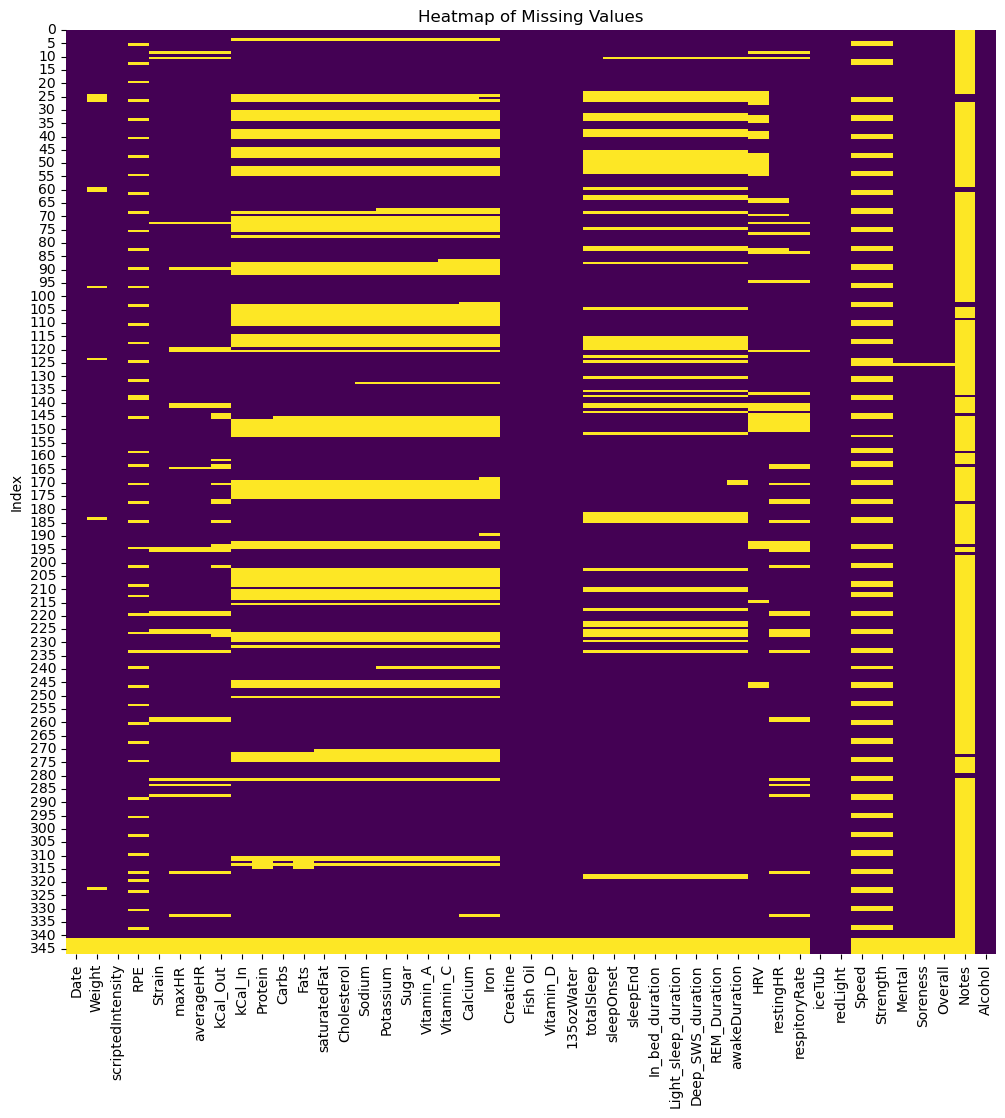

In [892]:
# plot a null values in heatmap to see where are they.
plt.figure(figsize=(12,12))
sns.heatmap(daily_performance_dataset.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.yticks(np.arange(0, len(daily_performance_dataset), 5), labels=daily_performance_dataset.index[::5])
plt.ylabel("Index")
plt.show()

In [893]:
# As we see from heatmap last 6 rows has Nan in almost every column.
daily_performance_dataset[daily_performance_dataset['Date'].isna() == True]

,Date,Weight,scriptedIntensity,RPE,Strain,maxHR,averageHR,kCal_Out,kCal_In,Protein,...,respitoryRate,iceTub,redLight,Speed,Strength,Mental,Soreness,Overall,Notes,Alcohol
341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,False
344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False


In [894]:
# That's why I am going to drop them.
daily_performance_dataset=daily_performance_dataset[~(daily_performance_dataset['Date'].isna())]

In [895]:
# Now I am going to transform Date from object field to datetime and i will put it like index.
# First I make a new column Weekday
daily_performance_dataset.loc[:, 'Weekday'] = pd.to_datetime(daily_performance_dataset['Date'], format="%A, %B %d, %Y").dt.day_name()

In [896]:
# Arrange the columns to start with "Date" and "Weekday", after that will be rest of them.
daily_performance_dataset = daily_performance_dataset[['Date', 'Weekday']+ [col for col in daily_performance_dataset.columns if col not in ["Date", "Weekday"]]]
daily_performance_dataset.head(2)

,Date,Weekday,Weight,scriptedIntensity,RPE,Strain,maxHR,averageHR,kCal_Out,kCal_In,...,respitoryRate,iceTub,redLight,Speed,Strength,Mental,Soreness,Overall,Notes,Alcohol
0,"Tuesday, March 1, 2022",Tuesday,227.0,Medium,6.0,9.4,173.0,132.0,2389.0,3819.8,...,13.5,True,True,8.0,9.0,10.0,2.0,8.0,NaN,False
1,"Wednesday, March 2, 2022",Wednesday,228.0,Light,5.0,7.2,156.0,128.0,2420.0,2849.6,...,13.4,True,False,7.0,9.0,8.0,4.0,7.0,NaN,False


In [897]:
# Transform "Date" in datetime
daily_performance_dataset.Date = pd.to_datetime(daily_performance_dataset.Date, format="%A, %B %d, %Y")
# daily_performance_dataset.Date = pd.to_datetime(daily_performance_dataset.Date)

In [898]:
daily_performance_dataset['Date']

0     2022-03-01
1     2022-03-02
2     2022-03-03
3     2022-03-04
4     2022-03-05
         ...    
336   2023-06-10
337   2023-06-11
338   2023-06-12
339   2023-06-13
340   2023-06-14
Name: Date, Length: 341, dtype: datetime64[ns]

In [899]:
# set 'Date' for index
daily_performance_dataset.set_index('Date', inplace=True)

In [900]:
daily_performance_dataset.index

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-10', '2023-06-11', '2023-06-12',
               '2023-06-13', '2023-06-14'],
              dtype='datetime64[ns]', name='Date', length=341, freq=None)

In [901]:
# Let's continue to deal with missing information in another column
daily_performance_dataset['Weight'][daily_performance_dataset['Weight'].isna()]

Date
2022-03-25   NaN
2022-03-26   NaN
2022-03-27   NaN
2022-04-29   NaN
2022-04-30   NaN
2022-06-05   NaN
2022-07-02   NaN
2022-12-17   NaN
2023-05-27   NaN
Name: Weight, dtype: float64

In [902]:
# Rows where missing information for 'Weight' occurs are distinct and not consecutive.
# Therefore, I chose to use interpolation to fill these gaps,
# assuming that subsequent data points will provide a more accurate estimate for the missing values.

daily_performance_dataset.Weight = daily_performance_dataset.Weight.interpolate(method='linear')

In [903]:
# check if everything is Ok
daily_performance_dataset['Weight'].isna().sum()

0

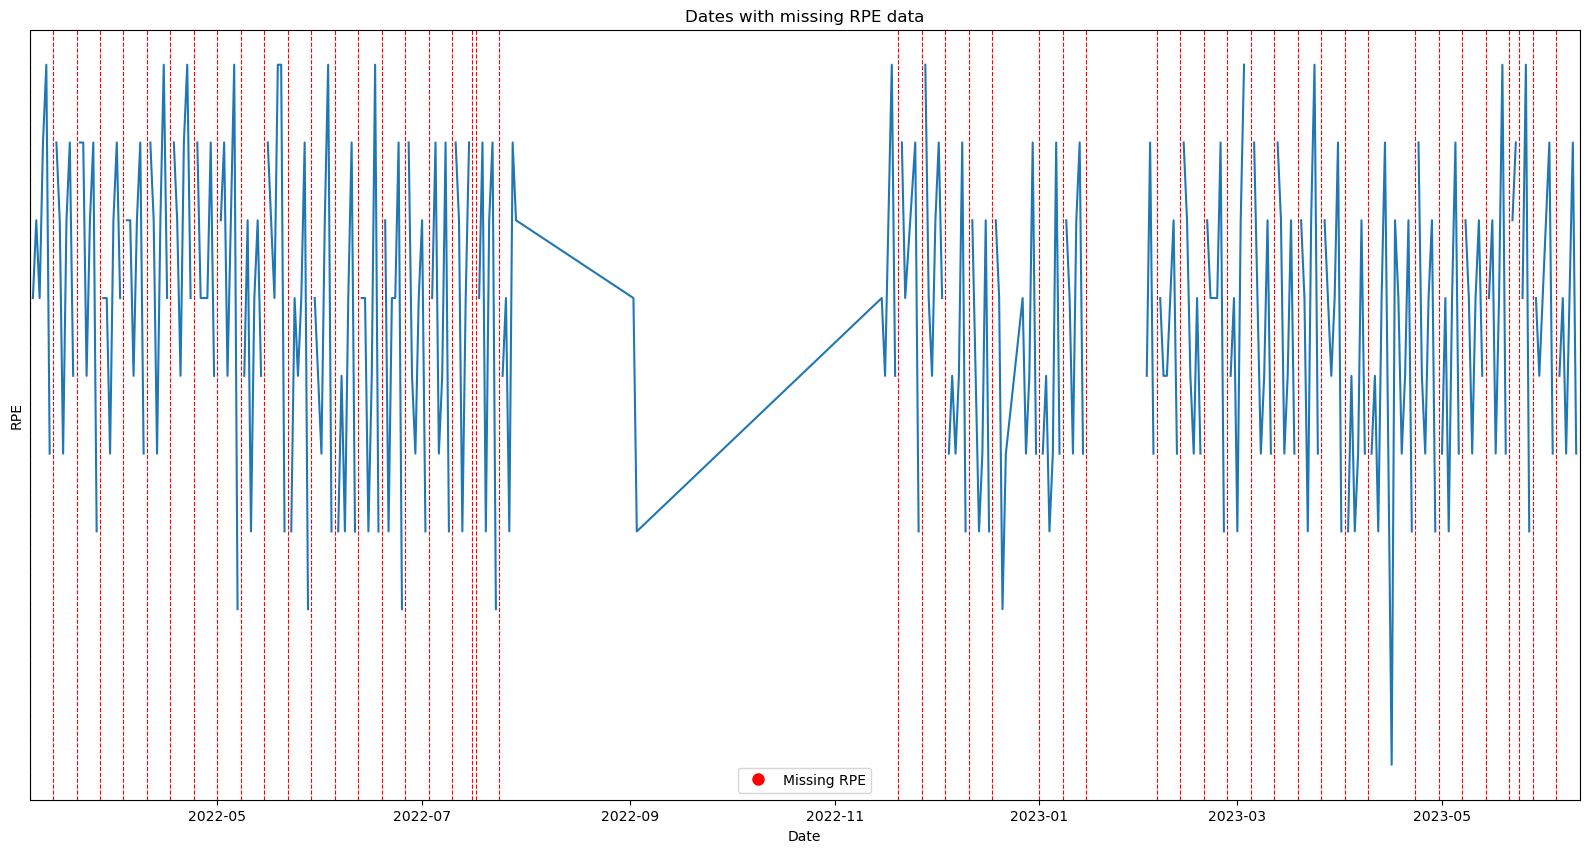

In [904]:
# creating plot for RPE data and visualize the NaN values
rpe_nan = daily_performance_dataset[daily_performance_dataset['RPE'].isna()]

plt.figure(figsize=(20,10))
plt.plot(daily_performance_dataset['RPE'])
plt.plot(rpe_nan.index, rpe_nan['RPE'], 'ro', markersize=8, label='Missing RPE')

for date in rpe_nan.index:
    plt.axvline(x=date, color='red', linestyle='dashed', linewidth=0.8)
    
plt.xlim(rpe_nan.index.min(), rpe_nan.index.max())
plt.yticks([])

plt.xlabel('Date')
plt.ylabel('RPE')

plt.title("Dates with missing RPE data")
plt.legend()
plt.show()

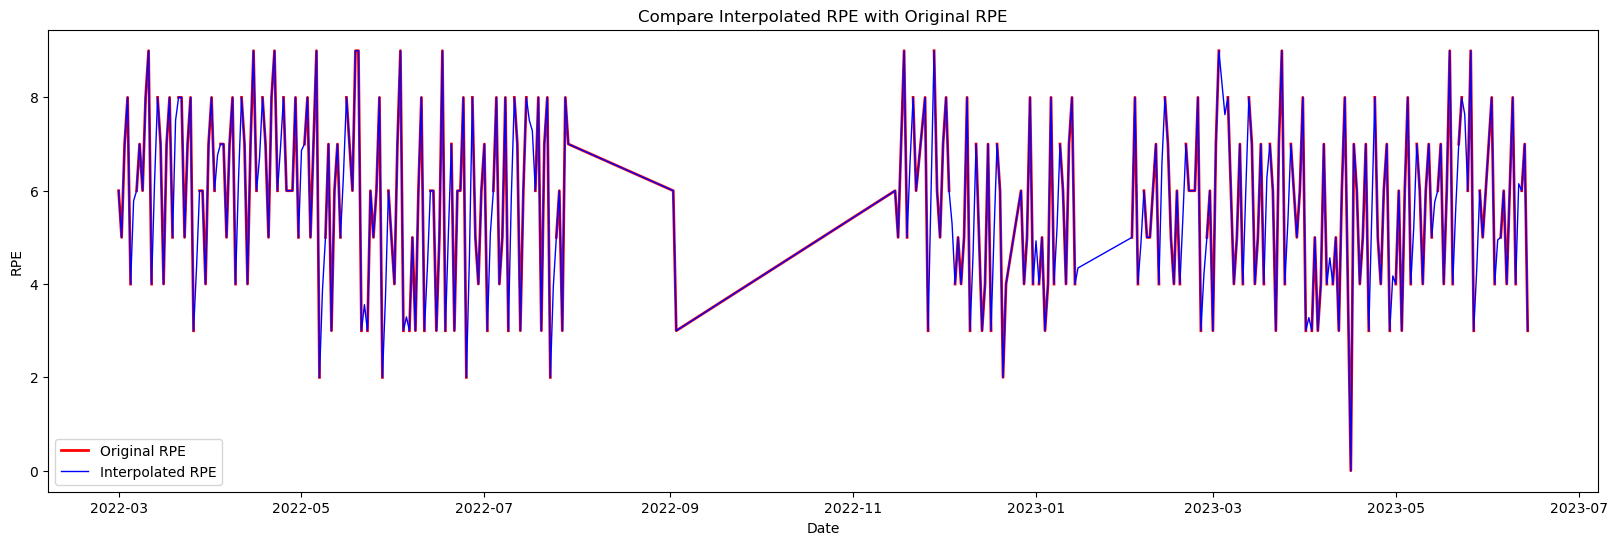

In [905]:
# For filling missing data i would use spline interpolation because this method can capture more of the underlying trend in the data.
plt.figure(figsize=(20,6))
daily_performance_dataset['RPE'].interpolate(method='spline', order=2)
plt.plot(daily_performance_dataset['RPE'], label='Original RPE', color='r',linewidth=2)
plt.plot(daily_performance_dataset['RPE'].interpolate(method='spline', order=1), label= "Interpolated RPE", color='b', linewidth=1)

plt.title("Compare Interpolated RPE with Original RPE")
plt.xlabel('Date')
plt.ylabel('RPE')
plt.legend()
plt.show()

In [906]:
# As it is seen from the figure this interpolation keeps trend of the RPE.
# Save Interpolated RPE as RPE
daily_performance_dataset['RPE'] = daily_performance_dataset['RPE'].interpolate(method='spline', order=1)

In [907]:
# Columns: Mental, Soreness and Overall have only 1 Nan.
# I will interpolate linear to fill this missing values.
daily_performance_dataset['Mental'] = daily_performance_dataset['Mental'].interpolate()
daily_performance_dataset['Soreness'] = daily_performance_dataset.Soreness.interpolate()
daily_performance_dataset['Overall'] = daily_performance_dataset['Overall'].interpolate()

In [908]:
daily_performance_dataset.isna().sum()

Weekday                   0
Weight                    0
scriptedIntensity         0
RPE                       0
Strain                   15
maxHR                    23
averageHR                23
kCal_Out                 34
kCal_In                  93
Protein                  95
Carbs                    94
Fats                     96
saturatedFat             95
Cholesterol              95
Sodium                   96
Potassium                98
Sugar                    98
Vitamin_A                98
Vitamin_C                99
Calcium                 101
Iron                    102
Creatine                  0
Fish Oil                  0
Vitamin_D                 0
135ozWater                0
totalSleep               59
sleepOnset               60
sleepEnd                 60
In_bed_duration          60
Light_sleep_duration     60
Deep_SWS_duration        60
REM_Duration             60
awakeDuration            62
HRV                      48
restingHR                46
respitoryRate       

In [909]:
# extract all numeric type columns with Nan values
nan_numeric_columns = daily_performance_dataset.select_dtypes(include='number').columns[daily_performance_dataset.select_dtypes(include='number').isna().any()]

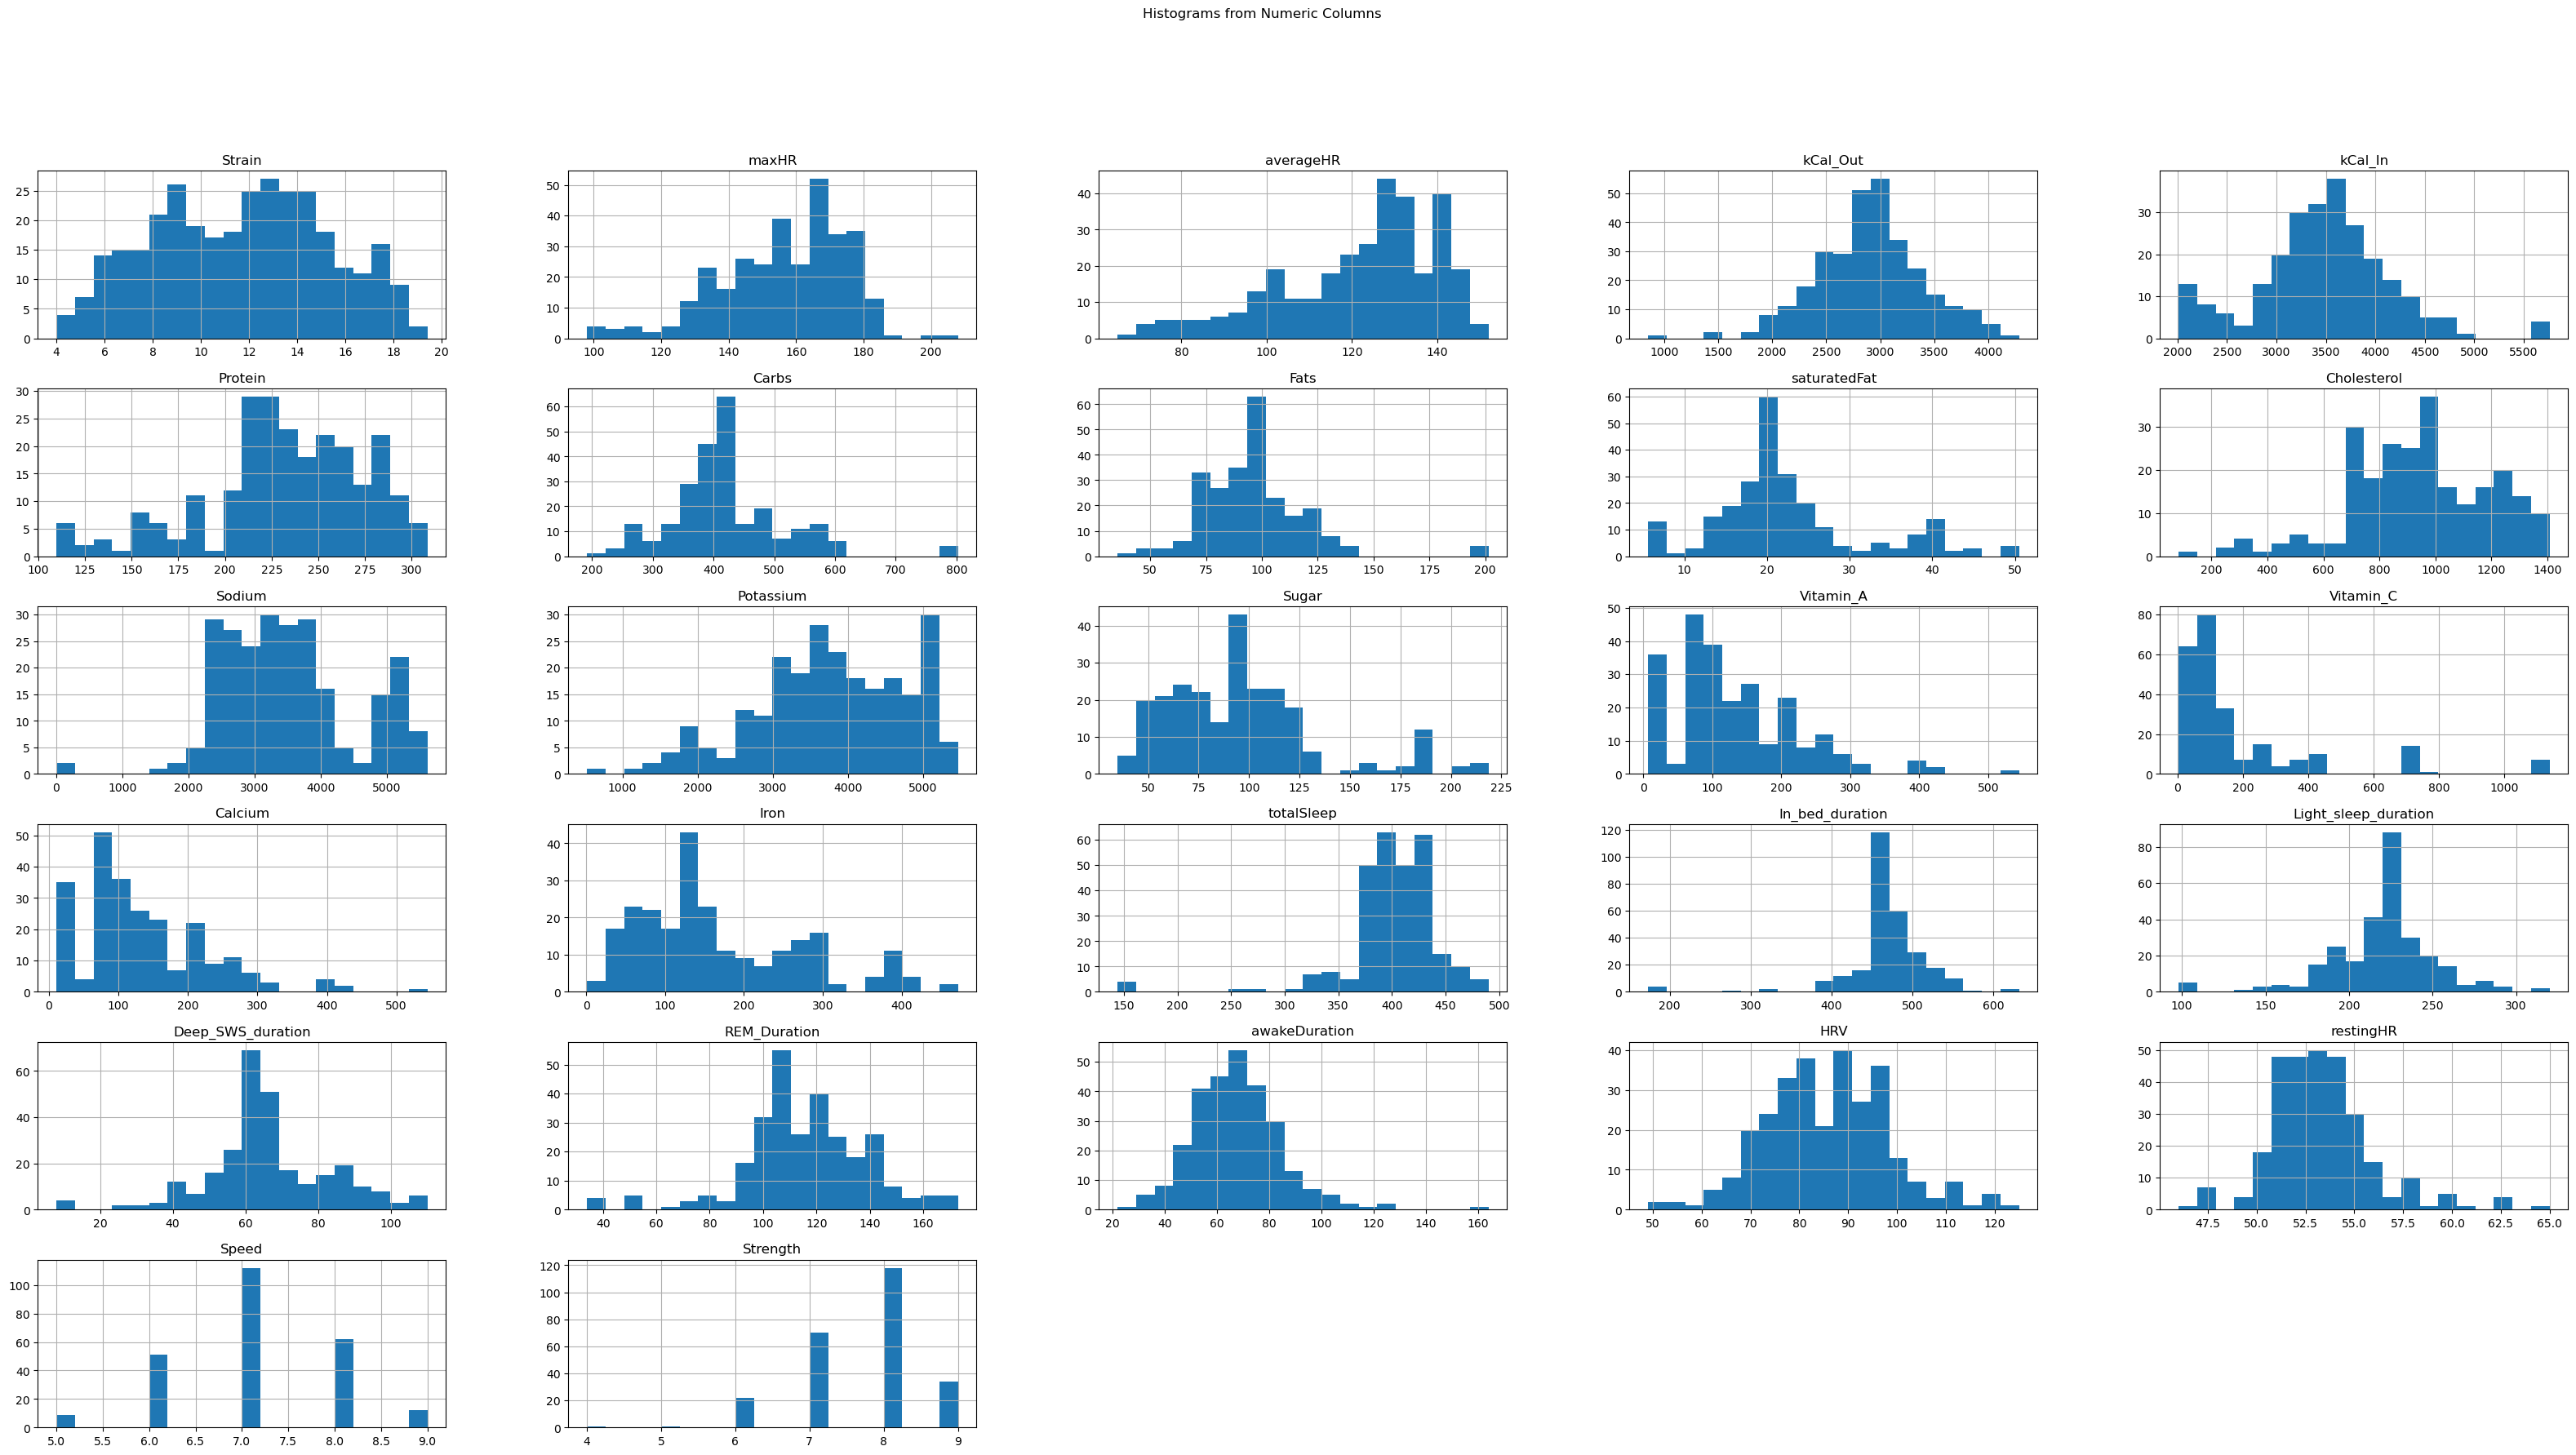

In [910]:
# creating histograms for all numeric type columns with Nan values
daily_performance_dataset[nan_numeric_columns].hist(figsize=(40,20), bins=20)
plt.suptitle('Histograms from Numeric Columns')
plt.show()

/tmp/ipykernel_6613/3956228284.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 4))


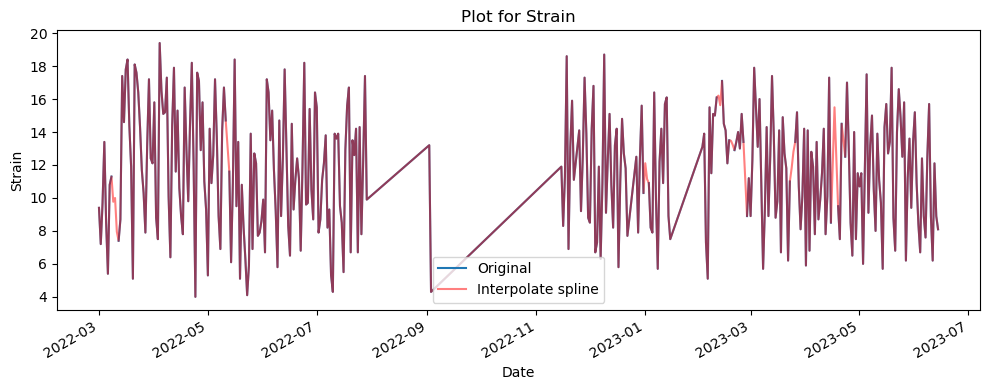

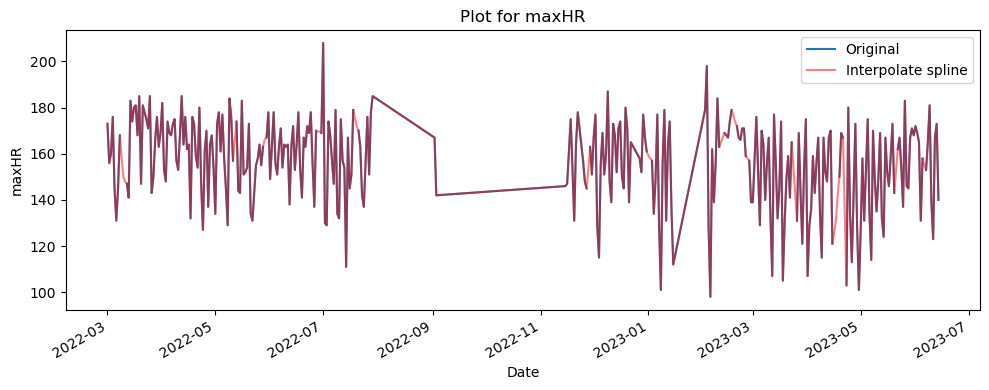

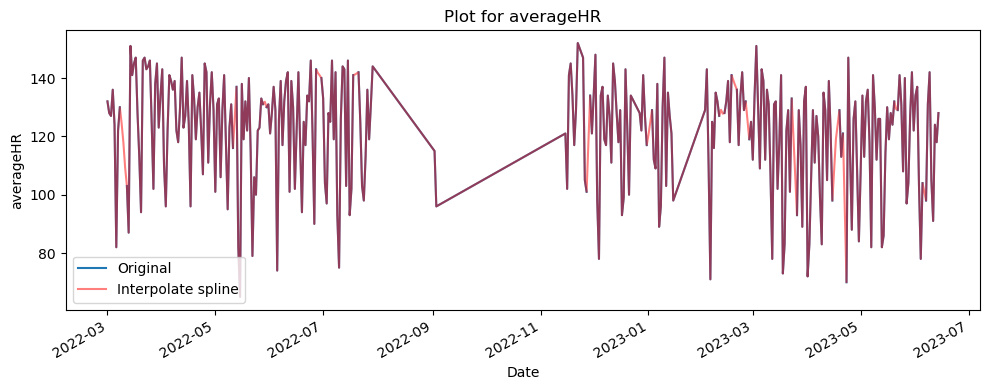

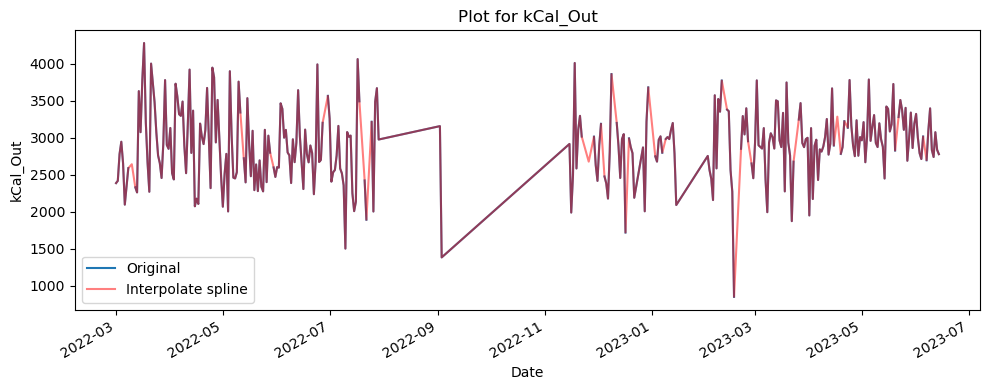

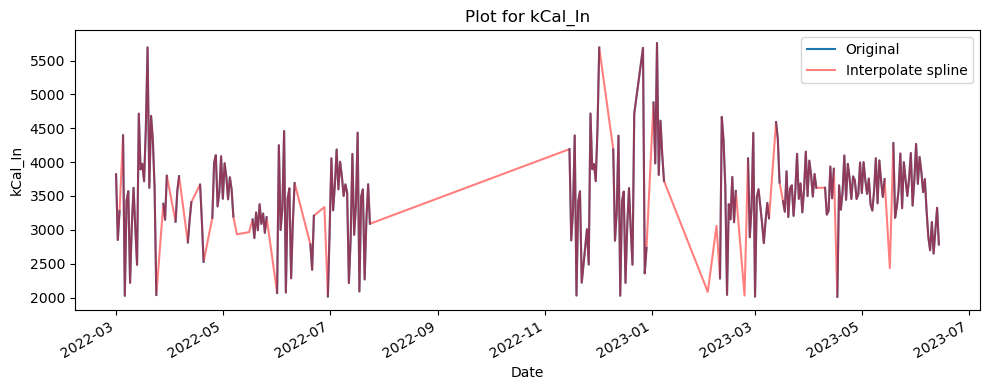

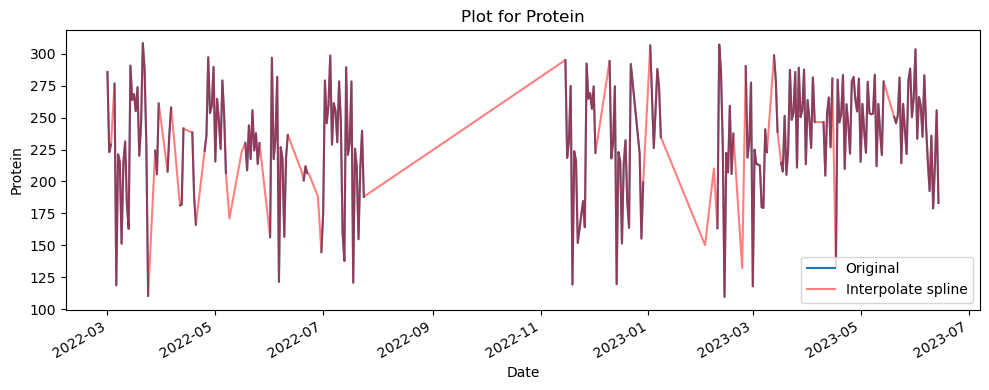

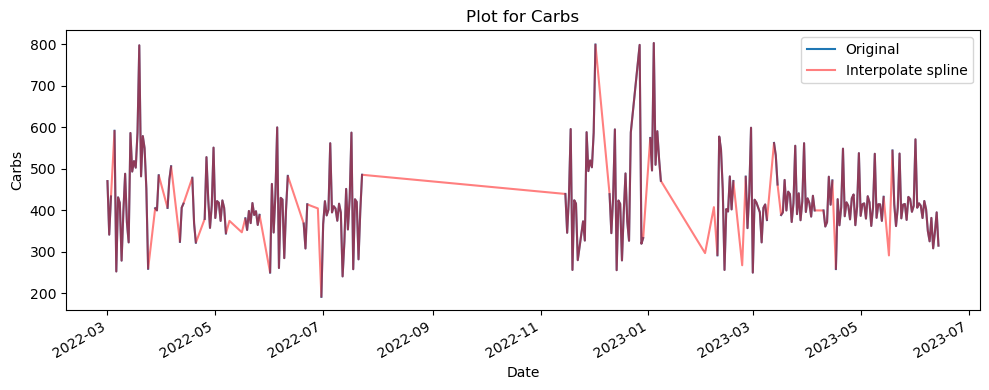

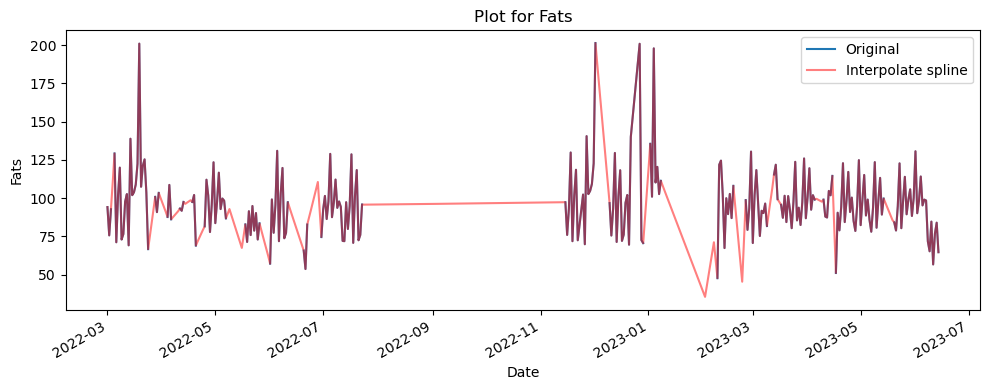

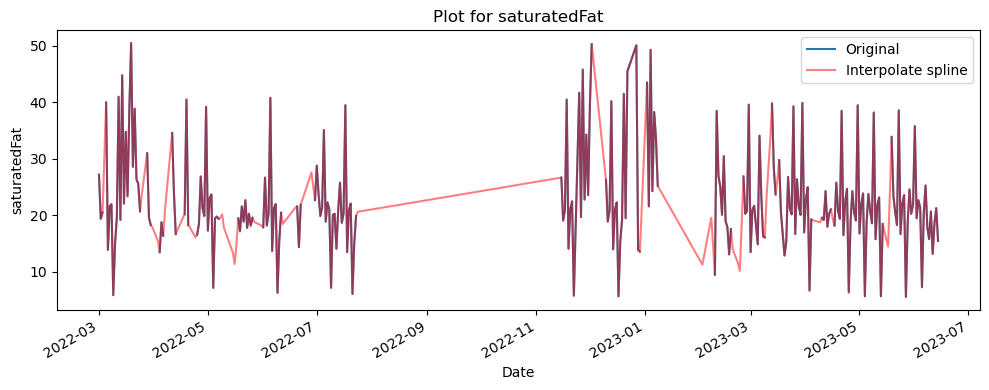

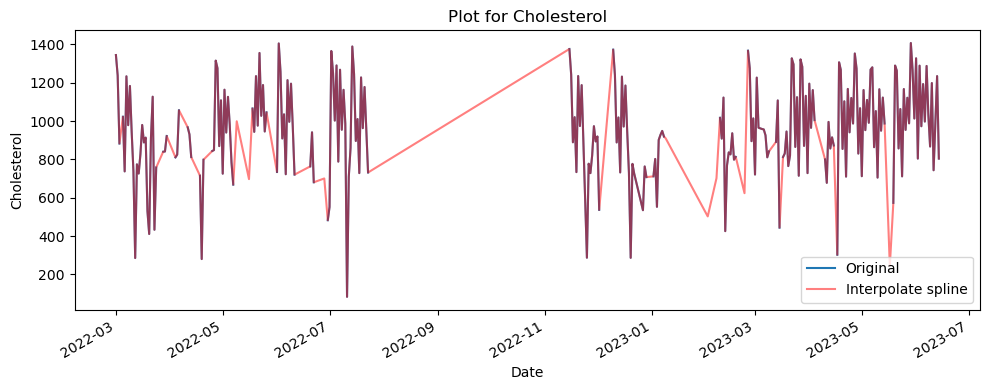

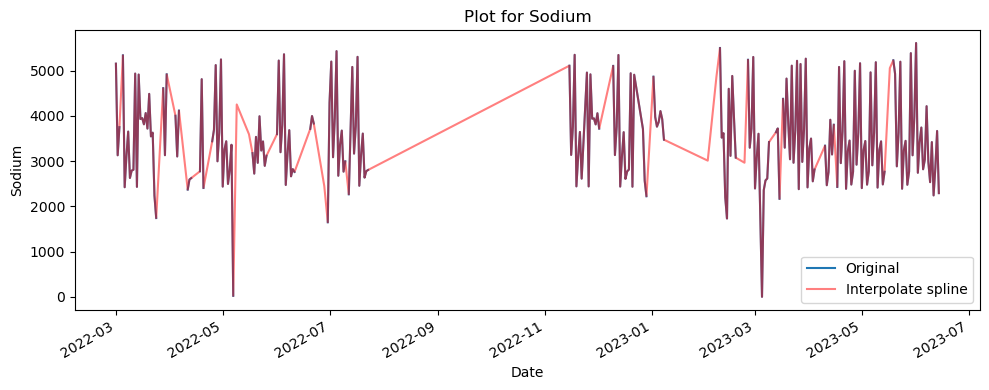

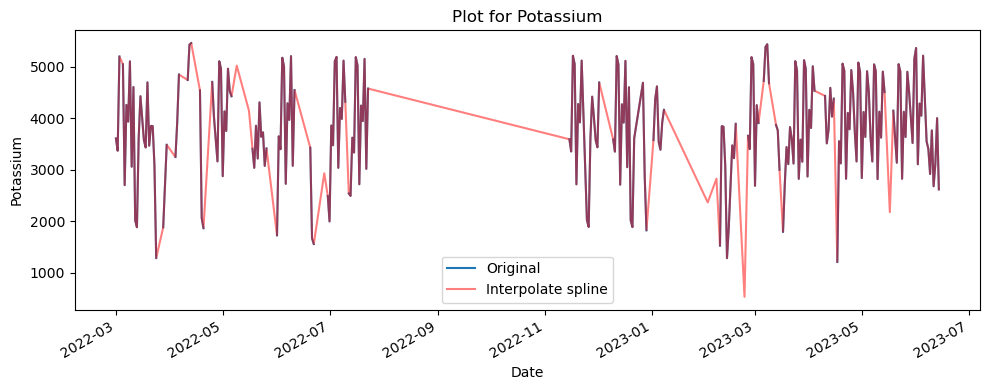

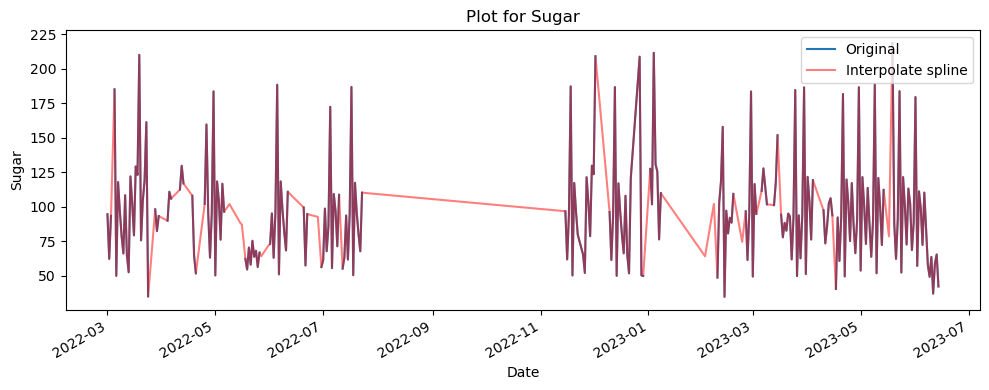

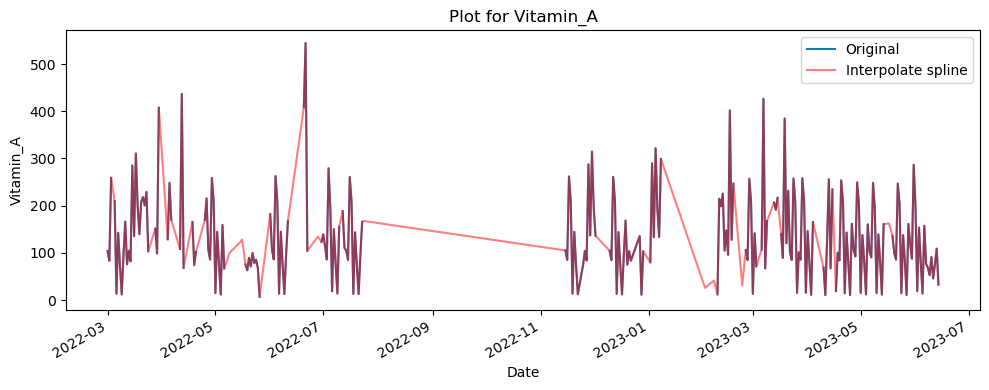

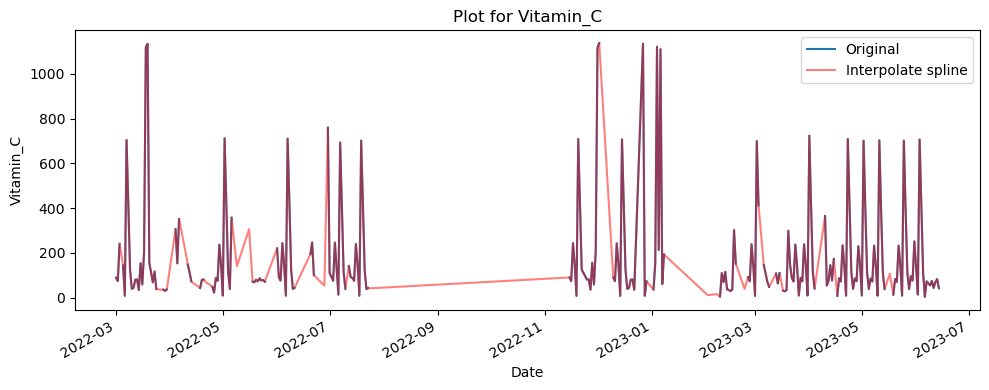

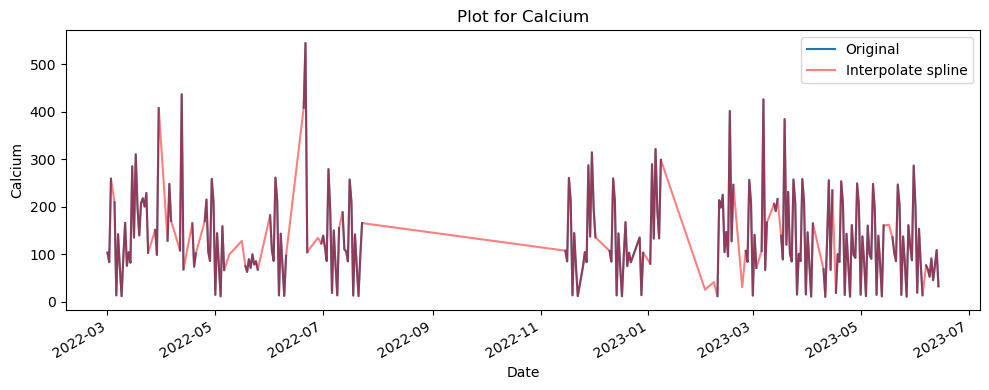

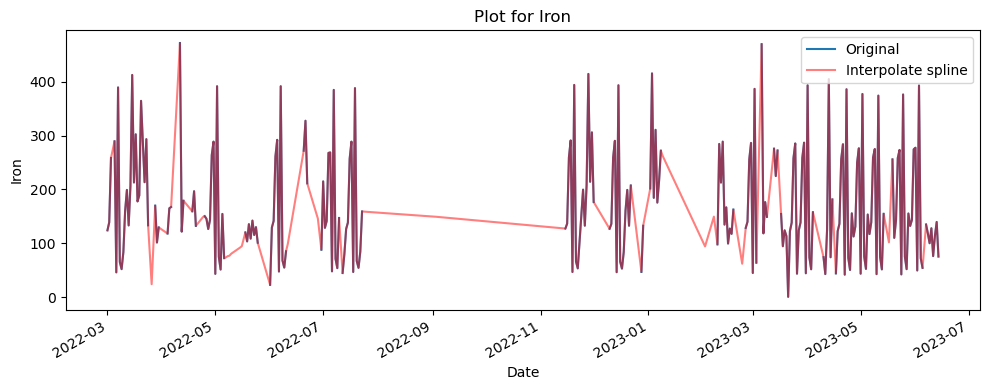

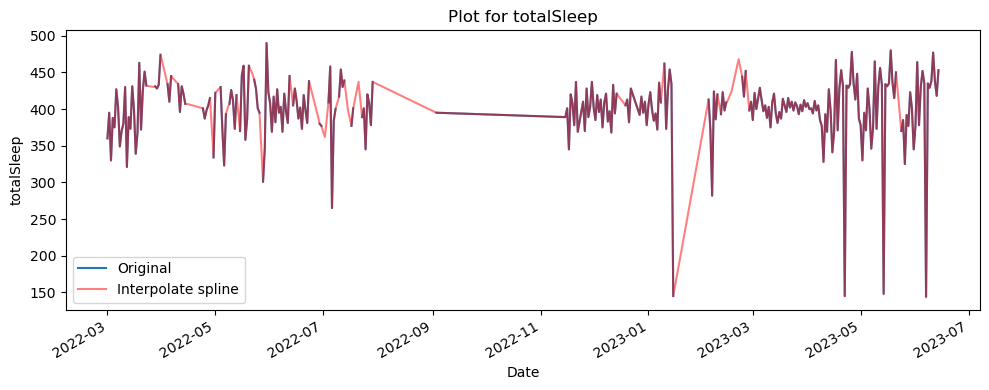

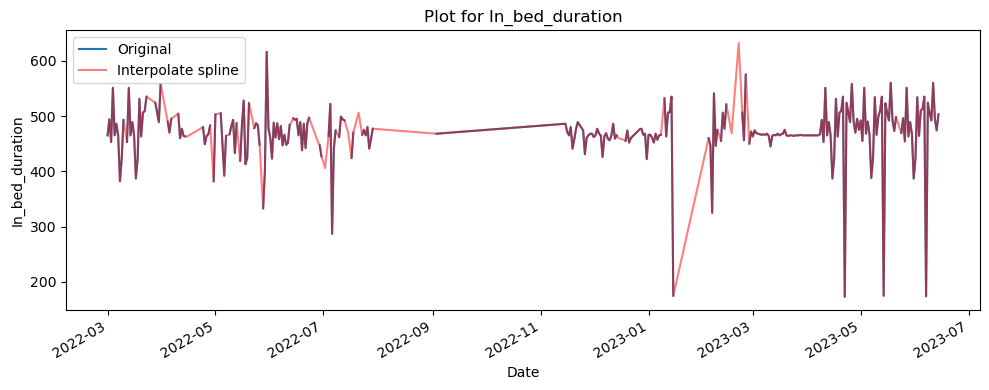

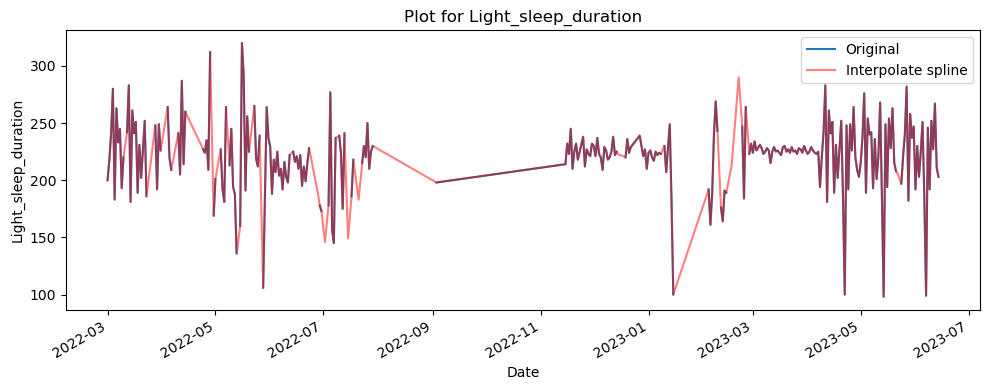

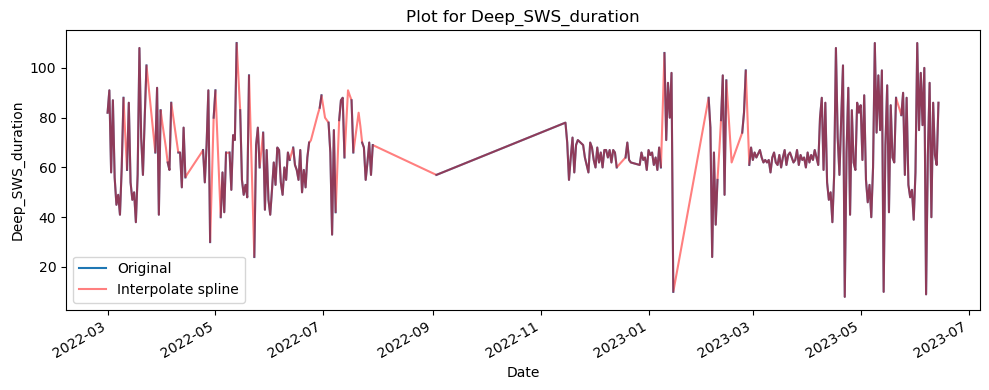

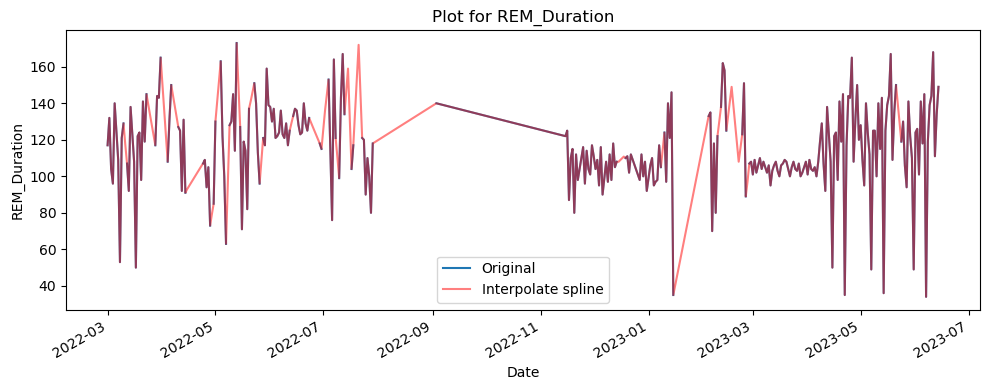

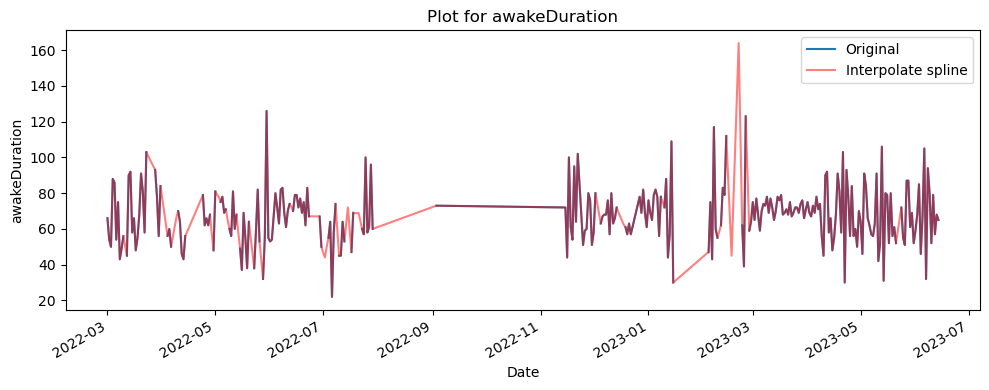

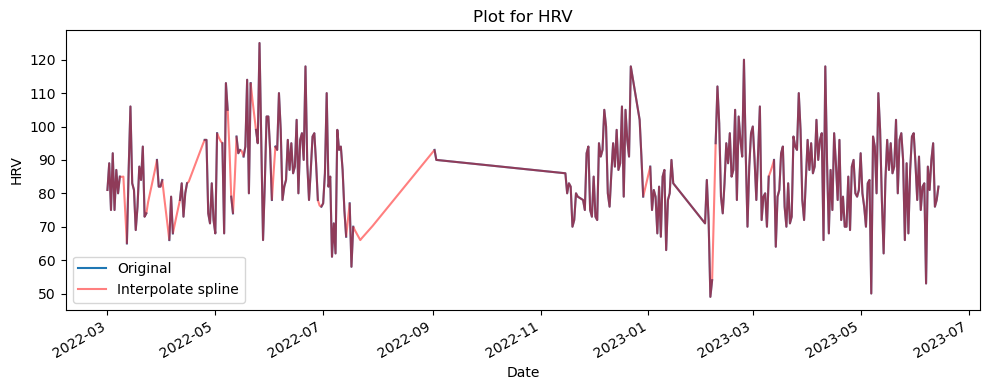

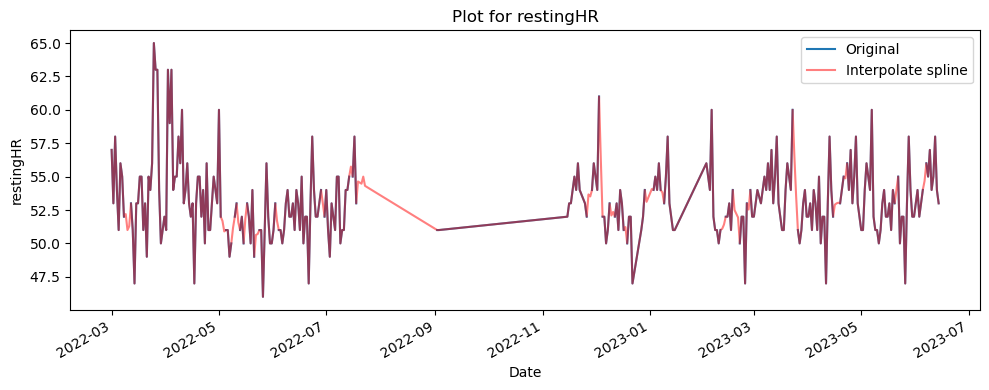

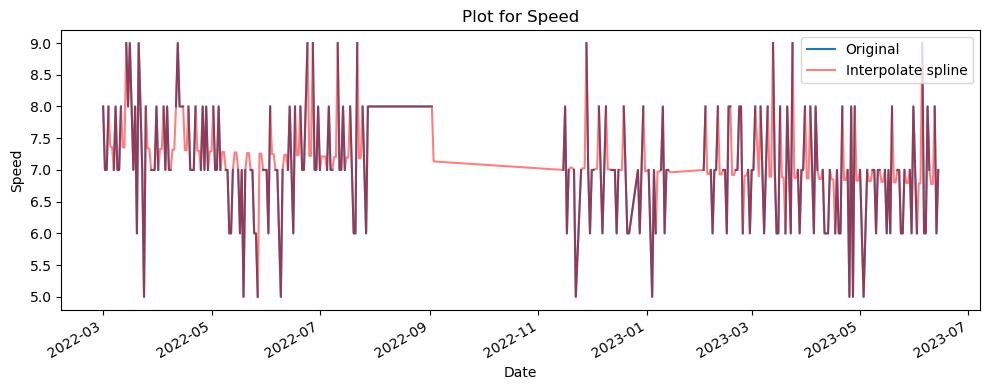

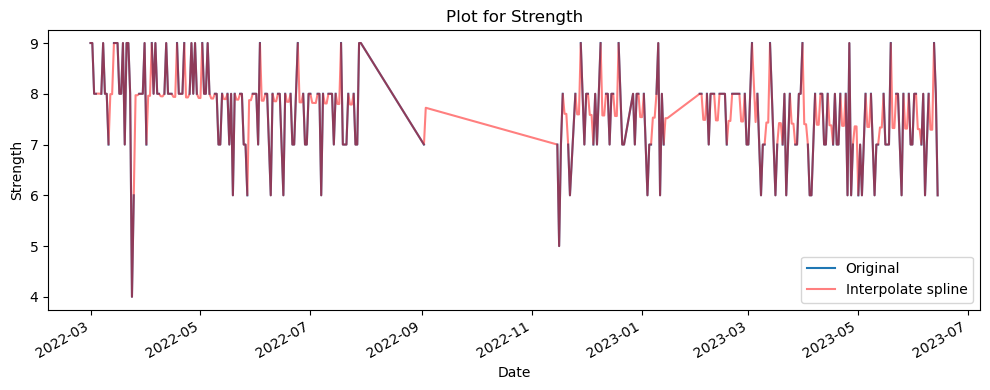

In [911]:
for i, col in enumerate(daily_performance_dataset[nan_numeric_columns]):
    plt.figure(figsize=(10, 4))

    daily_performance_dataset[col].plot(label='Original', linewidth=1.5, alpha=1)
    plt.plot(daily_performance_dataset[col].interpolate(method='spline', order=1), label='Interpolate spline', color='r', alpha=0.5)
    # plt.plot(daily_performance_dataset[col].fillna(method='ffill'), label='Forward Fill', color='g', alpha=0.7)
    # plt.plot(daily_performance_dataset[col].fillna(method='bfill'), label='Backward Fill', color='cyan', alpha=0.7)
    # plt.plot(daily_performance_dataset[col].interpolate(method='pchip'), label='Pchip interpolation', color='pink', alpha=0.7)
    # plt.plot(daily_performance_dataset.index, daily_performance_dataset[col].interpolate(method='time'), label='Time Interpolation', color='purple', alpha=0.7)
    # plt.plot(daily_performance_dataset.index, daily_performance_dataset[col].interpolate(method='polynomial', order=1), label='Polynomial Interpolation (Order 2)', color='orange', alpha=0.7)
    # plt.plot(daily_performance_dataset.index, daily_performance_dataset[col].interpolate(method='linear'), label='Linear Interpolation', color='brown', alpha=0.7)
    # plt.plot(daily_performance_dataset[col].fillna(daily_performance_dataset[col].mean()), color='black', label='mean')
    plt.xlabel('Date')
    plt.ylabel(f'{col}')
    plt.title(f'Plot for {col}')

    plt.legend()
    plt.tight_layout()
plt.show()

In [912]:
# Generally with spline interpolation it keeps the trends in missing information.
# There is a lot of missing information and if i drop this it will leave not engouht information.
# The missing information is basicly about calories and food nutriotions.
# Athletes often stick to some regime and that means nutriotions also stick to trend.
# After I tried different kind of interpolation methods and anothe filling approach
# I choosed interpolate method spline with order = 1.
for i, col in enumerate(daily_performance_dataset[nan_numeric_columns]):
    daily_performance_dataset[col] = daily_performance_dataset[col].interpolate(method='spline', order=1)

In [913]:
# check what columns left to be clean
daily_performance_dataset.isna().sum()

Weekday                   0
Weight                    0
scriptedIntensity         0
RPE                       0
Strain                    0
maxHR                     0
averageHR                 0
kCal_Out                  0
kCal_In                   0
Protein                   0
Carbs                     0
Fats                      0
saturatedFat              0
Cholesterol               0
Sodium                    0
Potassium                 0
Sugar                     0
Vitamin_A                 0
Vitamin_C                 0
Calcium                   0
Iron                      0
Creatine                  0
Fish Oil                  0
Vitamin_D                 0
135ozWater                0
totalSleep                0
sleepOnset               60
sleepEnd                 60
In_bed_duration           0
Light_sleep_duration      0
Deep_SWS_duration         0
REM_Duration              0
awakeDuration             0
HRV                       0
restingHR                 0
respitoryRate       

In [914]:
from datetime import timedelta

# Convert sleepOnset and sleepEnd to datetime
daily_performance_dataset['sleepOnset'] = pd.to_datetime(daily_performance_dataset['sleepOnset'], format='%I:%M:%S %p')
daily_performance_dataset['sleepEnd'] = pd.to_datetime(daily_performance_dataset['sleepEnd'], format='%I:%M:%S %p')

# Handle cases where sleepEnd is on the next day
daily_performance_dataset['sleepEnd'] = daily_performance_dataset.apply(lambda row: row['sleepEnd'] + timedelta(days=1) if row['sleepEnd'] < row['sleepOnset'] else row['sleepEnd'], axis=1)

# Calculate sleep duration
daily_performance_dataset['sleepDuration'] = daily_performance_dataset['sleepEnd'] - daily_performance_dataset['sleepOnset']

In [915]:
daily_performance_dataset['sleepOnset'] = daily_performance_dataset['sleepOnset'].dt.time

In [916]:
daily_performance_dataset['sleepEnd'] = daily_performance_dataset['sleepEnd'].dt.time

In [917]:
# Extracting hours from 'sleepDuration'
sleep_duration_hours = daily_performance_dataset['sleepDuration'].dt.total_seconds() // 3600

In [918]:
sleep_duration_hours[sleep_duration_hours < 0]

Series([], Name: sleepDuration, dtype: float64)

In [919]:
daily_performance_dataset.loc['2022-07-17':'2022-07-20',['sleepOnset', 'sleepEnd', 'sleepDuration']]

,sleepOnset,sleepEnd,sleepDuration
Date,,,
2022-07-17,01:18:02,08:22:56,0 days 07:04:54
2022-07-18,22:09:36,05:59:41,0 days 07:50:05
2022-07-19,NaT,NaT,NaT
2022-07-20,NaT,NaT,NaT


In [920]:
# Extracting minutes from 'sleepDuration'
sleep_duration_minutes = (daily_performance_dataset['sleepDuration'].dt.total_seconds() % 3600) // 60

In [921]:
# Convert minutes to hours
minutes_to_hours = sleep_duration_minutes / 60

In [922]:
# Extracting seconds
sleep_duration_seconds = daily_performance_dataset['sleepDuration'].dt.total_seconds() % 60

In [923]:
# Checking for missing data
daily_performance_dataset['sleepDuration'].isna().sum()

60

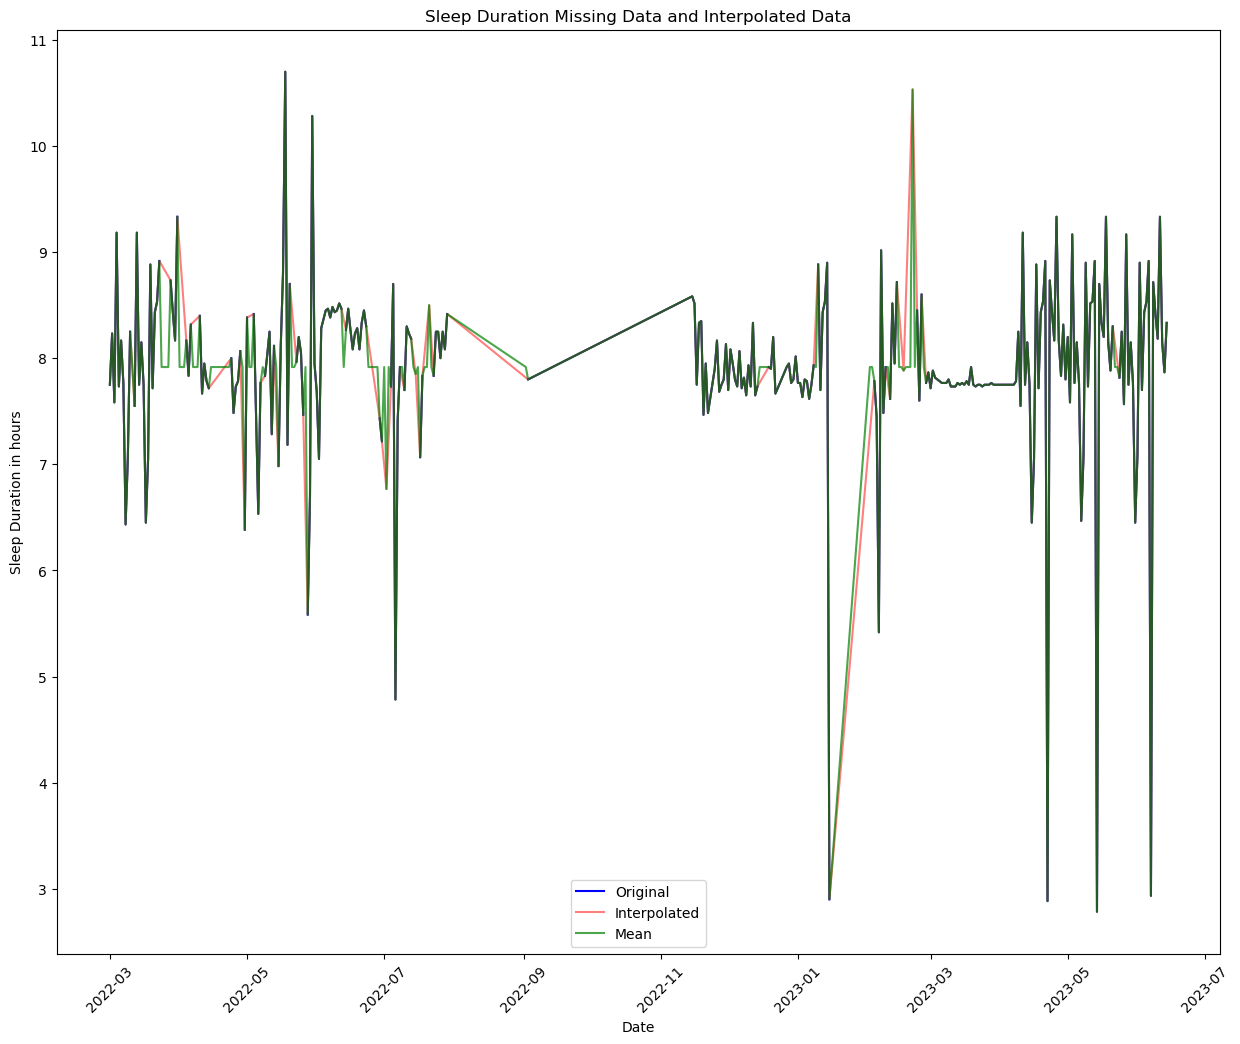

In [924]:
# Ploting for visualazing the missing data.
plt.figure(figsize=(15,12))
plt.plot(sleep_duration_hours + minutes_to_hours, label='Original', color='b')
plt.plot((sleep_duration_hours + minutes_to_hours).interpolate(method='time'), color='r', label='Interpolated', alpha=0.5)
plt.plot((sleep_duration_hours + minutes_to_hours).fillna((sleep_duration_hours + minutes_to_hours).mean()),
            color='green', label='Mean', alpha = 0.7)

# plt.xlim(daily_performance_dataset['sleepDuration'].idxmin(), daily_performance_dataset['sleepDuration'].idxmax())
plt.title('Sleep Duration Missing Data and Interpolated Data')
plt.xlabel('Date')
plt.ylabel('Sleep Duration in hours')

plt.xticks(rotation=45)

plt.legend(loc='lower center')
plt.show()

In [925]:
# I choose to fill missing data with time interpolation.
daily_performance_dataset['sleepDuration'] = (sleep_duration_hours+minutes_to_hours).interpolate(method='time')

In [926]:
daily_performance_dataset['sleepDuration']

Date
2022-03-01    7.750000
2022-03-02    8.233333
2022-03-03    7.583333
2022-03-04    9.183333
2022-03-05    7.733333
                ...   
2023-06-10    8.183333
2023-06-11    9.333333
2023-06-12    8.150000
2023-06-13    7.866667
2023-06-14    8.333333
Name: sleepDuration, Length: 341, dtype: float64

In [931]:
# Convert float to timedelta
# pd.to_timedelta(daily_performance_dataset['sleepDuration'], unit='h')

In [932]:
# Notes column containt specific information and can't be filled.
daily_performance_dataset.Notes.unique()

array([nan,
       'Flight to paris, start of birthday trip, glass of champaigne',
       'not going to log over the weekend, many glasses of wine',
       'flight back to nj', 'Drive to D.C.',
       'Night on in D.C. with the family, few drinks. decent amount of walking',
       'Jake bachelor party, few drinks, full day golfing,', 'hot yoga',
       'Beach day, headed to the Wknd concert at MetLife, 3 drinks',
       'Broadway show: Into the Woods, night out in NYC, 2 drinks',
       'day off, left ankle soreness',
       'large running increase, need to increase carb intake',
       'Dinner with Jades, one glass wine', 'Left Achilles tend.'],
      dtype=object)